In [18]:
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For scaling the data
from sklearn.preprocessing import scale

# To perform K-means clustering
from sklearn.cluster import KMeans

# To perform PCA
from sklearn.decomposition import PCA

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [35]:
food_data = pd.read_csv("food.csv")

In [36]:
food_data.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


In [37]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 7413 non-null   object 
 1   Description                                              7413 non-null   object 
 2   Nutrient Data Bank Number                                7413 non-null   int64  
 3   Data.Alpha Carotene                                      7413 non-null   int64  
 4   Data.Ash                                                 7413 non-null   float64
 5   Data.Beta Carotene                                       7413 non-null   int64  
 6   Data.Beta Cryptoxanthin                                  7413 non-null   int64  
 7   Data.Carbohydrate                                        7413 non-null   float64
 8   Data.Cholesterol            

In [43]:
## First let us see if we can explain the dataset using fewer variables
from sklearn.preprocessing import StandardScaler
food_data1=food_data.drop(['Category','Description','Data.Household Weights.1st Household Weight',
                           'Data.Household Weights.1st Household Weight Description','Data.Household Weights.2nd Household Weight',
                          'Data.Household Weights.2nd Household Weight Description'],1)## Droping string features
food_data1 = food_data1[['Data.Carbohydrate','Data.Cholesterol','Data.Kilocalories','Data.Protein','Data.Sugar Total','Data.Water',
                         'Data.Fat.Total Lipid',
          'Data.Major Minerals.Calcium',
          'Data.Vitamins.Vitamin A - IU','Data.Vitamins.Vitamin B6']]

standard_scaler = StandardScaler()
food_scaled = standard_scaler.fit_transform(food_data1)

In [44]:
pca = PCA(svd_solver='randomized', random_state=42)


# fiting PCA on the dataset
pca.fit(food_scaled)

PCA(random_state=42, svd_solver='randomized')

In [45]:
pca.components_

array([[ 4.29374194e-01, -3.99169208e-02,  5.02425636e-01,
         1.93157800e-02,  3.22808188e-01, -5.48208833e-01,
         2.85763941e-01,  1.71789589e-01,  1.77039388e-02,
         2.12168917e-01],
       [-3.92697427e-01,  3.77996509e-01,  2.98058577e-01,
         4.54328789e-01, -3.83220702e-01, -6.89043310e-02,
         4.93611118e-01, -7.16373827e-02, -2.67611694e-02,
        -8.09189835e-02],
       [ 2.17545146e-02,  2.77391895e-01, -1.76865169e-01,
         4.01678117e-01, -4.61653961e-02,  4.71629902e-04,
        -3.25392008e-01,  3.63836565e-01,  4.03094309e-01,
         5.71909422e-01],
       [-3.75630774e-02,  1.33750811e-01,  6.58151691e-02,
        -3.81469915e-01,  4.32883588e-02,  6.22833196e-02,
         2.16079903e-01, -2.90447322e-01,  8.31584575e-01,
        -5.01261662e-02],
       [-1.91388762e-01, -5.61092621e-01,  3.83321786e-02,
        -1.50982174e-01, -3.24953973e-01,  5.67188990e-02,
         2.48132080e-01,  6.48015993e-01,  1.82120164e-01,
        -2.

In [46]:
pca.explained_variance_ratio_

array([0.31114346, 0.18038999, 0.13442595, 0.09892997, 0.08924422,
       0.08058415, 0.05840988, 0.04559482, 0.00081413, 0.00046342])

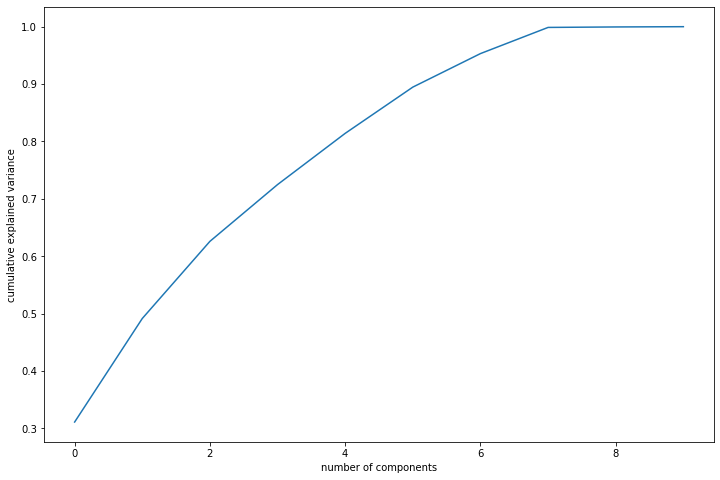

In [47]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [55]:
colnames = list(food_data1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5]})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5,PC6
0,Data.Carbohydrate,0.429374,-0.392697,0.021755,-0.037563,-0.191389,0.017278
1,Data.Cholesterol,-0.039917,0.377997,0.277392,0.133751,-0.561093,0.592140
2,Data.Kilocalories,0.502426,0.298059,-0.176865,0.065815,0.038332,-0.050533
3,Data.Protein,0.019316,0.454329,0.401678,-0.381470,-0.150982,-0.232974
4,Data.Sugar Total,0.322808,-0.383221,-0.046165,0.043288,-0.324954,0.226791
5,Data.Water,-0.548209,-0.068904,0.000472,0.062283,0.056719,0.044615
6,Data.Fat.Total Lipid,0.285764,0.493611,-0.325392,0.216080,0.248132,-0.007391
7,Data.Major Minerals.Calcium,0.171790,-0.071637,0.363837,-0.290447,0.648016,0.570013
8,Data.Vitamins.Vitamin A - IU,0.017704,-0.026761,0.403094,0.831585,0.182120,-0.039243
9,Data.Vitamins.Vitamin B6,0.212169,-0.080919,0.571909,-0.050126,-0.028396,-0.460767


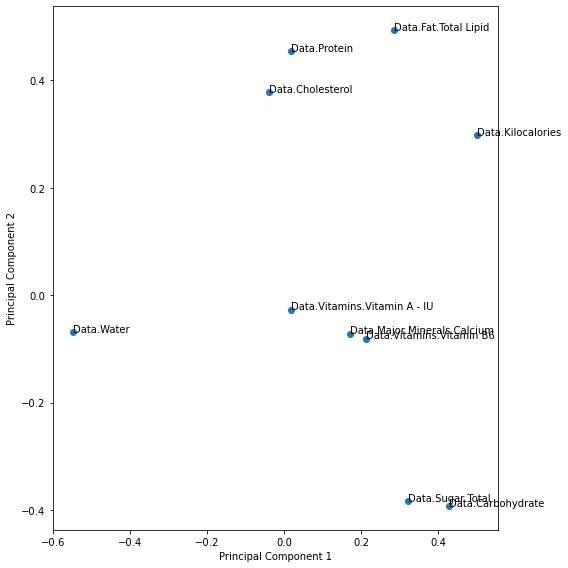

In [56]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [57]:
#Finally let's go ahead and do dimenstionality reduction using the four Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=6)

In [58]:
df_pca = pca_final.fit_transform(food_scaled)
df_pca.shape

(7413, 6)

In [59]:
pc = np.transpose(df_pca)

In [60]:
corrmat = np.corrcoef(pc)

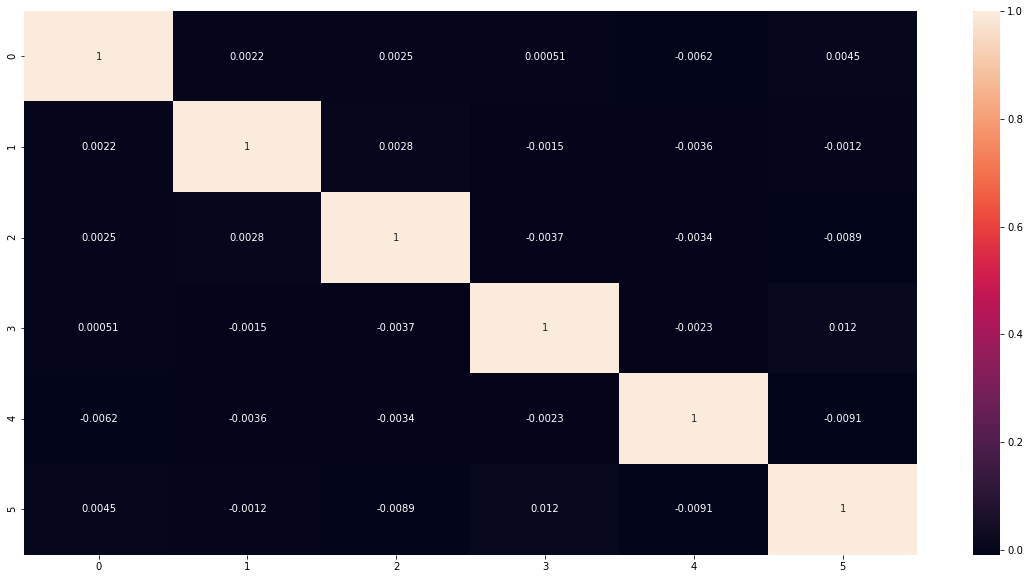

In [61]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [62]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4],'PC6':pc[5]})

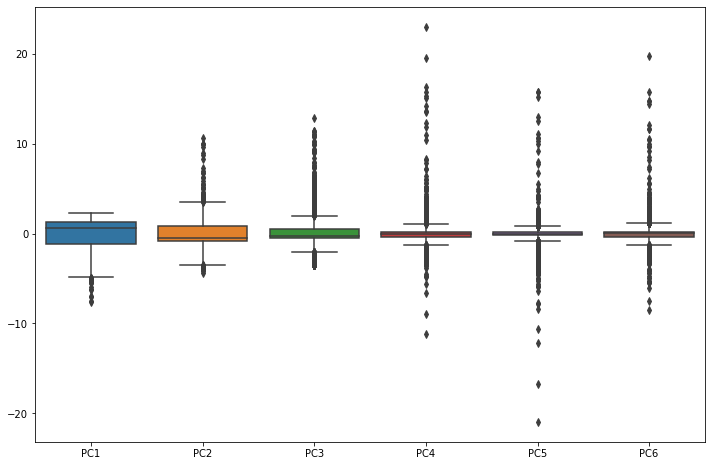

In [63]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

In [64]:
pcs_df2.shape

(7413, 6)

In [65]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.725988,3.719023,-2.052016,2.126968,-0.335133,1.101412
1,-2.724797,3.731567,-2.042111,2.130122,-0.314405,1.120925
2,-3.764208,4.686587,-2.476915,2.625248,-0.346712,1.235388
3,-0.848494,1.675374,0.653271,-0.760517,-1.589830,1.049839
4,-1.027207,1.831750,0.920103,-0.958412,-1.950936,1.550332


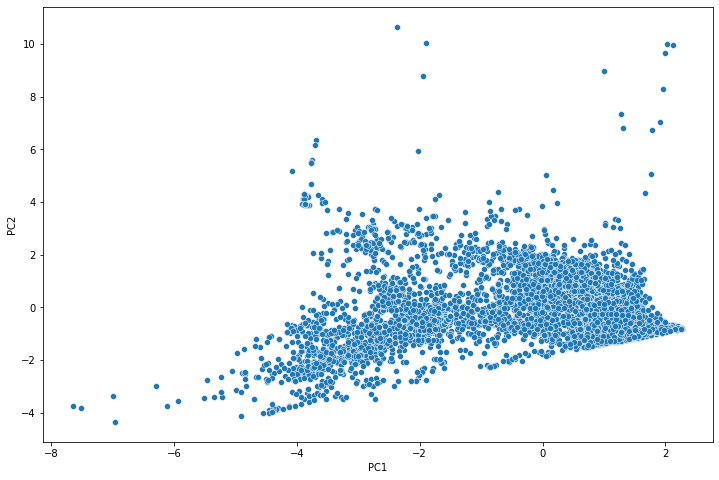

In [66]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

In [67]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [68]:
pcs_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     7413 non-null   float64
 1   PC2     7413 non-null   float64
 2   PC3     7413 non-null   float64
 3   PC4     7413 non-null   float64
 4   PC5     7413 non-null   float64
 5   PC6     7413 non-null   float64
dtypes: float64(6)
memory usage: 347.6 KB


In [69]:
hopkins(pcs_df2)

0.9878132966647585

Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [70]:
pcs_df2.shape

(7413, 6)

In [71]:
dat3_1 = pcs_df2

In [72]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

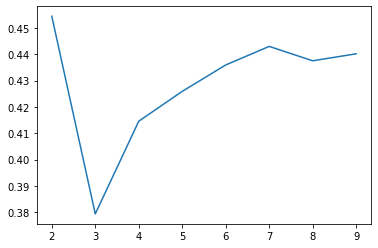

In [73]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

7 is the best

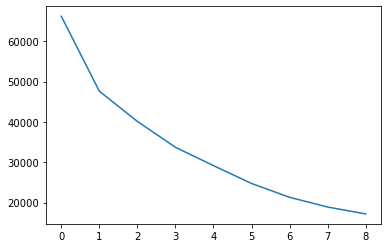

In [74]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

6 is good

In [75]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dat3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45438508277101963
For n_clusters=3, the silhouette score is 0.3794004959032542
For n_clusters=4, the silhouette score is 0.41439401024921746
For n_clusters=5, the silhouette score is 0.4230368698824474
For n_clusters=6, the silhouette score is 0.43583716075442586
For n_clusters=7, the silhouette score is 0.44305834637185254
For n_clusters=8, the silhouette score is 0.4374914131360847


In [107]:
model_clus2 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [108]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','ClusterID']
dat_km

,PC1,PC2,PC3,PC4,PC5,PC6,ClusterID
0,-2.725988,3.719023,-2.052016,2.126968,-0.335133,1.101412,2
1,-2.724797,3.731567,-2.042111,2.130122,-0.314405,1.120925,2
2,-3.764208,4.686587,-2.476915,2.625248,-0.346712,1.235388,2
3,-0.848494,1.675374,0.653271,-0.760517,-1.589830,1.049839,3
4,-1.027207,1.831750,0.920103,-0.958412,-1.950936,1.550332,3
...,...,...,...,...,...,...,...
7408,1.668826,0.217186,0.288145,-0.393593,0.099821,-0.174208,0
7409,-0.284429,1.602565,0.109105,-0.117540,-0.067270,-0.189930,3
7410,1.300417,0.612133,0.660495,-0.783651,-0.161195,-0.116394,3
7411,1.523677,0.244364,0.240980,-0.344613,0.119531,-0.198696,0


In [109]:
dat_km['ClusterID'].value_counts()

0    2978
3    2509
1    1613
2     313
Name: ClusterID, dtype: int64

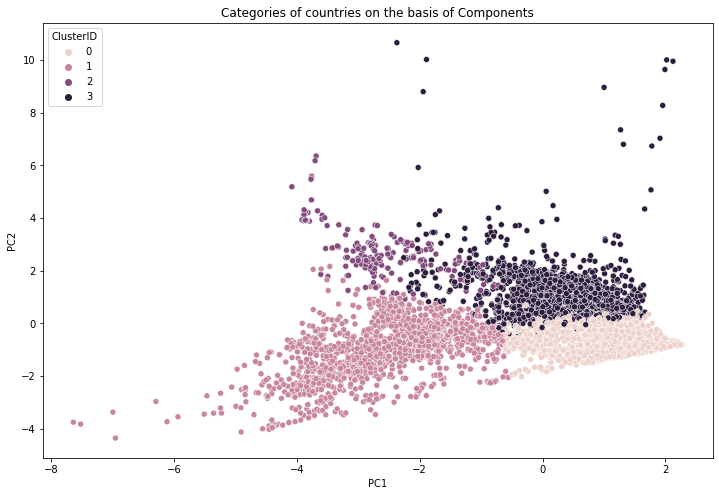

In [110]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

plt.title('Categories of countries on the basis of Components')
plt.show()

In [111]:
dat5=pd.merge(food_data,dat_km, left_index=True,right_index=True)
dat5.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,PC1,PC2,PC3,PC4,PC5,PC6,ClusterID
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,0.0,2.32,7.0,-2.725988,3.719023,-2.052016,2.126968,-0.335133,1.101412,2
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,0.0,2.32,7.0,-2.724797,3.731567,-2.042111,2.130122,-0.314405,1.120925,2
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,0.0,2.80,8.6,-3.764208,4.686587,-2.476915,2.625248,-0.346712,1.235388,2
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,0.0,0.25,2.4,-0.848494,1.675374,0.653271,-0.760517,-1.589830,1.049839,3
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,0.0,0.26,2.5,-1.027207,1.831750,0.920103,-0.958412,-1.950936,1.550332,3


In [112]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4','PC5','PC6'],axis=1)
dat6.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,ClusterID
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0,2
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0,2
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6,2
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4,3
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5,3


In [113]:
dat6.shape

(7413, 49)

'Data.Carbohydrate','Data.Cholesterol','Data.Kilocalories','Data.Protein','Data.Sugar Total','Data.Water',
                         'Data.Fat.Total Lipid',
          'Data.Major Minerals.Calcium',
          'Data.Vitamins.Vitamin A - IU','Data.Vitamins.Vitamin B6'

In [114]:
Cluster_Data_Carbohydrate=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Carbohydrate'].mean())
Cluster_Data_Cholesterol=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Cholesterol'].mean())
Cluster_Data_Kilocalories=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Kilocalories'].mean())
Cluster_Data_Protein=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Protein'].mean())
Cluster_Data_SugarTotal=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Sugar Total']).mean()
Cluster_Data_Water=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Water']).mean()
Cluster_Data_Fat_TotalLipid=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Fat.Total Lipid']).mean()
Cluster_Data_MajorMinerals_Calcium=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Major Minerals.Calcium'].mean())
Cluster_Data_Vitamins_VitaminA=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Vitamins.Vitamin A - IU'].mean())
Cluster_Data_Vitamins_VitaminB6=pd.DataFrame(dat6.groupby(["ClusterID"])['Data.Vitamins.Vitamin B6'].mean())

In [115]:
df = pd.concat([Cluster_Data_Carbohydrate,Cluster_Data_Cholesterol,Cluster_Data_Kilocalories,Cluster_Data_Protein,Cluster_Data_SugarTotal,
                Cluster_Data_Water,Cluster_Data_Fat_TotalLipid,Cluster_Data_MajorMinerals_Calcium,Cluster_Data_Vitamins_VitaminA,
               Cluster_Data_Vitamins_VitaminB6], axis=1)

In [116]:
df.columns = ['Data.Carbohydrate','Data.Cholesterol','Data.Kilocalories','Data.Protein','Data.Sugar Total','Data.Water',
                         'Data.Fat.Total Lipid',
          'Data.Major Minerals.Calcium',
          'Data.Vitamins.Vitamin A - IU','Data.Vitamins.Vitamin B6']
df

,Data.Carbohydrate,Data.Cholesterol,Data.Kilocalories,Data.Protein,Data.Sugar Total,Data.Water,Data.Fat.Total Lipid,Data.Major Minerals.Calcium,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin B6
0,12.906400,4.608126,81.294829,2.967579,1.5,1.5,1.5,41.467764,922.473808,0.077113
1,68.406032,5.574086,384.373218,8.119640,NaN,NaN,NaN,167.466212,949.939864,0.584519
2,8.538978,32.003195,704.968051,7.505623,NaN,NaN,NaN,45.201278,776.127796,0.135329
3,4.004839,96.754484,217.442806,22.259853,NaN,NaN,NaN,56.551216,465.394580,0.312205


In [118]:
dat6[['ClusterID']==1]

KeyError: False